In [1]:
import pygyre as pg
import matplotlib.pyplot as plt
import numpy as np

In [2]:
s = pg.read_output('summary.h5')

In [3]:
s

E_norm,M_star,R_star,freq,l,n_pg,omega
float64,float64,float64,complex128,int32,int32,complex128
19.806390126976062,5.965229612094151e+32,22256494669.040718,(16.250860916685664+0j),2,-3,(0.6218866055204929+0j)
14.623751299124176,5.965229612094151e+32,22256494669.040718,(21.731525372568495+0j),2,-2,(0.8316202209849048+0j)
3.339758462842171,5.965229612094151e+32,22256494669.040718,(32.63386002753691+0j),2,-1,(1.248829864559254+0j)
0.1431273402660151,5.965229612094151e+32,22256494669.040718,(41.134830049388384+0j),2,0,(1.5741442843690128+0j)
0.015303492667346836,5.965229612094151e+32,22256494669.040718,(85.6446633569697+0j),2,1,(3.277442915121187+0j)
0.003205238417434325,5.965229612094151e+32,22256494669.040718,(128.42476059118047+0j),2,2,(4.914548148450935+0j)
0.000981987642085043,5.965229612094151e+32,22256494669.040718,(170.00134561301397+0j),2,3,(6.505597475678545+0j)
0.00036791574452147303,5.965229612094151e+32,22256494669.040718,(210.44785885562553+0j),2,4,(8.05340130924414+0j)
0.00015674954220690088,5.965229612094151e+32,22256494669.040718,(249.92587215747307+0j),2,5,(9.56414266693868+0j)


In [4]:
d = pg.read_output('detail.l2.n-3.h5')

In [5]:
c0 = 299792458
GNewton = 6.67408*10**(-11)

Rstar=s['R_star'][1] / 100
Mstar = s['M_star'][1] / 1000
M_r = d['M_r'] / 1000

rho_Dles = (d['rho'] * 10**3) * Rstar**2 * GNewton/ c0**2
M_Dles = Mstar * GNewton/ c0**2 / Rstar
Mr_Dles = M_r * GNewton/ c0**2 / Rstar

In [6]:
np.trapz(4.0*(np.pi)*(d['x'])*(rho_Dles)*Mr_Dles,d['x']) / (M_Dles**2)

0.9302835674398569

In [7]:
1/((rho_Dles[0]/(M_Dles/ (4/3 *np.pi)))**(1/3)*0.5)

0.8557910937375901

In [8]:
(rho_Dles[0]/(M_Dles/ (4/3 *np.pi)))

12.763997182419155

In [12]:
Rstar / (6.957 * 10 ** 8)

0.319915116703187

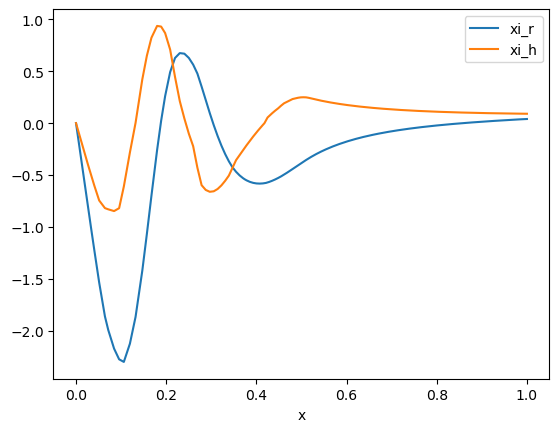

In [13]:

plt.figure()

plt.plot(d['x'], d['xi_r'].real, label='xi_r')
plt.plot(d['x'], d['xi_h'].real, label='xi_h')

plt.xlabel('x')

plt.legend()

/var/folders/kp/rh36hgtx0q15743dct9h77000000gn/T/ipykernel_69863/2715802805.py:11: RuntimeWarning: divide by zero encountered in divide
  d['Sl2'] = l*(l+1)*Gamma_1/(V*c_1)


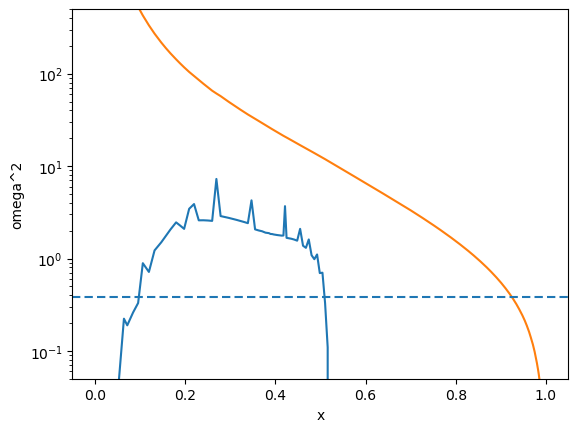

In [14]:
l = d.meta['l']
omega = d.meta['omega']

x = d['x']
V = d['V_2']*d['x']**2
As = d['As']
c_1 = d['c_1']
Gamma_1 = d['Gamma_1']

d['N2'] = d['As']/d['c_1']
d['Sl2'] = l*(l+1)*Gamma_1/(V*c_1)

# Plot the propagation diagram

plt.figure()

plt.plot(d['x'], d['N2'], label='N^2')
plt.plot(d['x'], d['Sl2'], label='S_l^2')

plt.axhline(omega.real**2, dashes=(4,2))

plt.xlabel('x')
plt.ylabel('omega^2')

plt.ylim(5e-2, 5e2)
plt.yscale('log')

In [62]:
D_overlap = np.trapz(rho_Dles *( d['x']**3 * d['xi_r'] + 3 * d['x']**2 * (d['x'] * d['xi_h'])),d['x']) / M_Dles

In [63]:
N_overlap= np.trapz(rho_Dles *( d['x']**2 * d['xi_r']**2 + 6 * (d['x'] * d['xi_h'])**2 ),d['x']) / M_Dles

In [64]:
D_overlap **2 / N_overlap

(1.1470995913046613e-05+0j)